1. Return to 20484 resolution
2. Split into 2 hemispheres
3. Check every hemisphere separately

https://brainder.org/2016/05/31/downsampling-decimating-a-brain-surface/

> Idea is to check 

In [1]:
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score
from igraph import Graph
from igraph import ADJ_MAX
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [2]:
def load_mesh_boris(path='/home/bgutman/datasets/HCP/Dan_iso5.m'):
    '''
    load boris mesh (.m) file
    faces enumerated from 1, but after loading from 0
    usage:
    vertices, faces = load_mesh_boris('/home/bgutman/datasets/HCP/Dan_iso5.m')
    '''
    with open(path, 'r') as f:
        iso5 = f.read()
    iso5 = iso5.split('\n')
    vertices = []
    faces = []
    for line in iso5:
        a = line.split(' ')
        if a[0] == 'Vertex':
            vertices.append([float(sym) for sym in a[2:5]])
        elif a[0] == 'Face':
            faces.append([int(sym) for sym in a[2:]])
    vertices = np.array(vertices)
    faces = np.array(faces) - 1
    return vertices, faces

def get_mesh_adjacency():
    vertices, faces = load_mesh_boris('../HCP/Dan_rot.m')
    edge_list = dict()
    for face in faces:
        for vertex in face:
            if vertex not in edge_list.keys():
                edge_list[vertex] = set()
        for v1 in face:
            for v2 in face:
                if v1!=v2:
                    edge_list[v1].add(v2)
    adj = np.zeros((len(edge_list), len(edge_list))) # 10242
    for key, val in edge_list.items():
         for v in val:
                adj[key, v] = 1
    return adj

def return_connected_percentage(mesh_adjacency, color_hemisphere):
    
    n_connected = 0
    for c in np.unique(color_hemisphere):
        ind = color_hemisphere == c
        subgraph = mesh_adjacency[:, ind][ind, :]
        graph = Graph.Weighted_Adjacency(subgraph.tolist(), mode=ADJ_MAX, attr='weight')
        labels = graph.clusters().membership
        value, counts = np.unique(labels, return_counts=True)
        n_connected += max(counts)
    return n_connected/10242


In [3]:
parcellation = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level3/60/ensemble_3_60.npy')
# parcellation = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/CSPA/level3/CSPA_3_10.npy')

average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')

labels = np.zeros(20484)
labels[average_desikan != -1] = parcellation

left = labels[:10242]
right = labels[10242:]

# left = average_desikan[:10242]
# right = average_desikan[10242:]

# Intra hemisphere

In [4]:
# HE3
left_perc = []
right_perc = []
for sparsity in tqdm(range(10, 101, 10)):
    parcellation = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level3/{sparsity}/ensemble_3_{sparsity}.npy')
    average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
    labels = np.zeros(20484)
    labels[average_desikan != -1] = parcellation
    left = labels[:10242]
    right = labels[10242:]
    mesh_adj = get_mesh_adjacency()
    l = return_connected_percentage(mesh_adj, left)
    r = return_connected_percentage(mesh_adj, right)
    left_perc.append(l)
    right_perc.append(r)
left_perc = np.array(left_perc)
right_perc = np.array(right_perc)
both=np.concatenate([left_perc, right_perc])
np.mean(both), np.std(both)

100%|██████████| 10/10 [00:28<00:00,  2.81s/it]


(0.9473930872876393, 0.006655361597811928)

In [5]:
# HE2
left_perc = []
right_perc = []
for sparsity in tqdm(range(10, 101, 10)):
    parcellation = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level2/{sparsity}/ensemble_2_{sparsity}.npy')
    average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
    labels = np.zeros(20484)
    labels[average_desikan != -1] = parcellation
    left = labels[:10242]
    right = labels[10242:]
    mesh_adj = get_mesh_adjacency()
    l = return_connected_percentage(mesh_adj, left)
    r = return_connected_percentage(mesh_adj, right)
    left_perc.append(l)
    right_perc.append(r)
left_perc = np.array(left_perc)
right_perc = np.array(right_perc)
both=np.concatenate([left_perc, right_perc])
np.mean(both), np.std(both)

100%|██████████| 10/10 [00:38<00:00,  3.83s/it]


(0.9375512595196251, 0.00672367933917002)

In [6]:
# HE1
left_perc = []
right_perc = []
for sparsity in tqdm(range(10, 101, 10)):
    parcellation = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level1/{sparsity}/ensemble_1_{sparsity}.npy')
    average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
    labels = np.zeros(20484)
    labels[average_desikan != -1] = parcellation
    left = labels[:10242]
    right = labels[10242:]
    mesh_adj = get_mesh_adjacency()
    l = return_connected_percentage(mesh_adj, left)
    r = return_connected_percentage(mesh_adj, right)
    left_perc.append(l)
    right_perc.append(r)
left_perc = np.array(left_perc)
right_perc = np.array(right_perc)
both=np.concatenate([left_perc, right_perc])
np.mean(both), np.std(both)

100%|██████████| 10/10 [01:20<00:00,  8.17s/it]


(0.9255125951962506, 0.006602028020313523)

In [8]:
#CSPA1
left_perc = []
right_perc = []
for sparsity in tqdm(range(10, 101, 10)):
    parcellation = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/CSPA/level1/CSPA_1_{sparsity}.npy')
    average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
    labels = np.zeros(20484)
    labels[average_desikan != -1] = parcellation
    left = labels[:10242]
    right = labels[10242:]
    mesh_adj = get_mesh_adjacency()
    l = return_connected_percentage(mesh_adj, left)
    r = return_connected_percentage(mesh_adj, right)
    left_perc.append(l)
    right_perc.append(r)
left_perc = np.array(left_perc)
right_perc = np.array(right_perc)
both=np.concatenate([left_perc, right_perc])
np.mean(both), np.std(both)

100%|██████████| 10/10 [01:37<00:00,  9.97s/it]


(0.942603983596954, 0.015753609261888638)

In [9]:
#CSPA2
left_perc = []
right_perc = []
for sparsity in tqdm(range(10, 101, 10)):
    parcellation = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/CSPA/level2/CSPA_2_{sparsity}.npy')
    average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
    labels = np.zeros(20484)
    labels[average_desikan != -1] = parcellation
    left = labels[:10242]
    right = labels[10242:]
    mesh_adj = get_mesh_adjacency()
    l = return_connected_percentage(mesh_adj, left)
    r = return_connected_percentage(mesh_adj, right)
    left_perc.append(l)
    right_perc.append(r)
left_perc = np.array(left_perc)
right_perc = np.array(right_perc)
both=np.concatenate([left_perc, right_perc])
np.mean(both), np.std(both)

100%|██████████| 10/10 [01:10<00:00,  7.07s/it]


(0.9118775629759812, 0.059351829913783405)

In [13]:
#CSPA3
left_perc = []
right_perc = []
for sparsity in tqdm(range(10, 101, 10)):
    parcellation = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/CSPA/level3/CSPA_3_{sparsity}.npy')
    average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
    labels = np.zeros(20484)
    labels[average_desikan != -1] = parcellation
    left = labels[:10242]
    right = labels[10242:]
    mesh_adj = get_mesh_adjacency()
    l = return_connected_percentage(mesh_adj, left)
    r = return_connected_percentage(mesh_adj, right)
    left_perc.append(l)
    right_perc.append(r)
left_perc = np.array(left_perc)
right_perc = np.array(right_perc)
both=np.concatenate([left_perc, right_perc])
np.mean(both), np.std(both)

100%|██████████| 10/10 [00:58<00:00,  5.69s/it]


(0.9322837336457723, 0.04972654472347136)

In [10]:
#AVER1
left_perc = []
right_perc = []
for sparsity in tqdm(range(10, 101, 10)):
    parcellation = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/average_network_partition/level1/aver_level1_{sparsity}.npy')
    average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
    labels = np.zeros(20484)
    labels[average_desikan != -1] = parcellation
    left = labels[:10242]
    right = labels[10242:]
    mesh_adj = get_mesh_adjacency()
    l = return_connected_percentage(mesh_adj, left)
    r = return_connected_percentage(mesh_adj, right)
    left_perc.append(l)
    right_perc.append(r)
left_perc = np.array(left_perc)
right_perc = np.array(right_perc)
both=np.concatenate([left_perc, right_perc])
np.mean(both), np.std(both)

100%|██████████| 10/10 [01:05<00:00,  6.61s/it]


(0.8660661980082015, 0.08480151300664794)

In [11]:
#AVER2
left_perc = []
right_perc = []
for sparsity in tqdm(range(10, 101, 10)):
    parcellation = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/average_network_partition/level2/aver_level2_{sparsity}.npy')
    average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
    labels = np.zeros(20484)
    labels[average_desikan != -1] = parcellation
    left = labels[:10242]
    right = labels[10242:]
    mesh_adj = get_mesh_adjacency()
    l = return_connected_percentage(mesh_adj, left)
    r = return_connected_percentage(mesh_adj, right)
    left_perc.append(l)
    right_perc.append(r)
left_perc = np.array(left_perc)
right_perc = np.array(right_perc)
both=np.concatenate([left_perc, right_perc])
np.mean(both), np.std(both)

100%|██████████| 10/10 [00:33<00:00,  3.34s/it]


(0.8868482718219098, 0.03630958443512033)

In [12]:
#AVER3
left_perc = []
right_perc = []
for sparsity in tqdm(range(10, 101, 10)):
    parcellation = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/average_network_partition/level3/aver_level3_{sparsity}.npy')
    average_desikan = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/desikan_aparc_average_1113.npy')
    labels = np.zeros(20484)
    labels[average_desikan != -1] = parcellation
    left = labels[:10242]
    right = labels[10242:]
    mesh_adj = get_mesh_adjacency()
    l = return_connected_percentage(mesh_adj, left)
    r = return_connected_percentage(mesh_adj, right)
    left_perc.append(l)
    right_perc.append(r)
left_perc = np.array(left_perc)
right_perc = np.array(right_perc)
both=np.concatenate([left_perc, right_perc])
np.mean(both), np.std(both)

100%|██████████| 10/10 [00:27<00:00,  2.78s/it]


(0.9155877758250339, 0.011321386814561112)

In [17]:
labels = np.load('/data01/ayagoz/sparse_32_concon_HCP/parcellations/destrieux_aparc2009_average_1113.npy')
left = labels[:10242]
right = labels[10242:]
mesh_adj = get_mesh_adjacency()
l = return_connected_percentage(mesh_adj, left)
r = return_connected_percentage(mesh_adj, right)

In [18]:
l

0.9894551845342706

In [19]:
r

0.9968756102323765

In [105]:
left_perc = np.array(left_perc)
right_perc = np.array(right_perc)

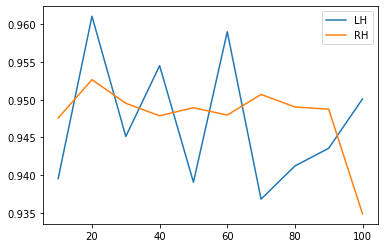

In [136]:
plt.plot(range(10,101,10), left_perc, label='LH')
plt.plot(range(10,101,10), right_perc, label='RH')
# plt.ylim(0,1)
plt.legend();

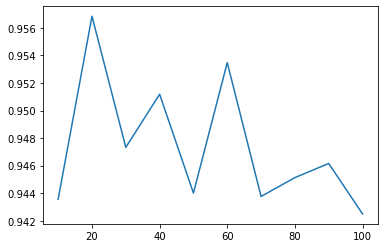

In [134]:
plt.plot(range(10,101,10), (left_perc+right_perc)/2)

# Inter hemisphere

In [127]:
r_v, r_c = np.unique(right, return_counts=True)
for v,c in zip(*np.unique(left, return_counts=True)):
    if v in r_v:
        ind = np.where(r_v==v)[0][0]
        print(c, r_c[ind])

825 790
132 131
107 112
168 141
102 136
166 139
105 124
1 1
113 113
17 80
100 96
84 80
118 105


In [129]:
l, r = average_desikan[:10242], average_desikan[10242:]

In [132]:
np.unique(l, return_counts=True)

(array([-1.,  1.,  2.,  3.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35.]),
 array([825, 131,  77, 254, 115,  49, 298, 525, 268, 176, 370, 256, 276,
        200, 285,  92, 211, 199,  53, 136, 104, 619, 202, 629, 457,  88,
        444, 774, 647, 448, 530,  19,  55,  61, 369]))

In [133]:
np.unique(r, return_counts=True)

(array([-1., 36., 37., 38., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
        49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61.,
        62., 63., 64., 65., 66., 67., 68., 69., 70.]),
 array([790, 123,  96, 228, 114,  40, 287, 614, 267, 173, 364, 258, 251,
        177, 306,  85, 243, 167,  71, 157, 103, 578, 210, 654, 478,  73,
        464, 754, 644, 445, 514,  27,  58,  48, 381]))

In [110]:
np.unique(right, return_counts=True)

(array([ 0.,  3.,  4.,  6.,  8., 10., 12., 14., 15., 17., 20., 21., 23.,
        24., 25., 27., 28., 29., 30., 33., 35., 39., 42., 43., 51., 52.,
        54., 55., 56., 57., 59., 60., 61., 62., 63., 65., 66., 70., 71.,
        72., 73., 75., 76., 78., 79., 80., 81., 83., 84.]),
 array([790, 211, 131, 112, 215, 383, 162, 141, 284, 342, 190, 136, 232,
        388, 271, 262, 150, 129, 239, 147, 139,  12, 298, 292, 244, 257,
        373, 112, 211, 148, 124, 313, 162,   1, 167, 254, 113, 293,  63,
         80, 257, 256, 231, 136, 213, 297,  96,  80, 105]))

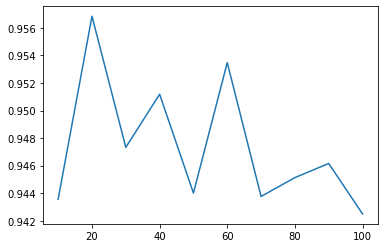

In [107]:
plt.plot(range(10,101,10), (right_perc+left_perc)/2, label='RH')

In [92]:
np.unique(left, return_counts=True)
np.unique(right, return_counts=True)

adjusted_mutual_info_score(left, right, average_method='arithmetic')

0.6659962344151232

In [93]:
# for i,color in enumerate(np.unique(right)[1:]):
#     d = pdist(vertices[right==color])
#     plt.figure()
#     plt.hist(d, bins=30);
#     plt.title(f'{i},{color}')

0.9589923842999414


In [64]:
ind = left == 32
subgraph = adj[:, ind][ind, :]

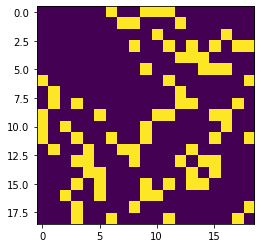

In [66]:
plt.imshow(subgraph)

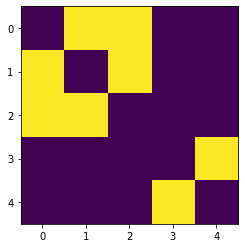

In [78]:
test = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 1, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0]
])

plt.imshow(test)
subgraph = test
graph = Graph.Weighted_Adjacency(subgraph.tolist(), mode=ADJ_MAX, attr='weight')
labels = graph.clusters().membership
value, counts = np.unique(labels, return_counts=True)

In [58]:
from scipy.spatial.distance import pdist, cdist

/home/kurmukov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


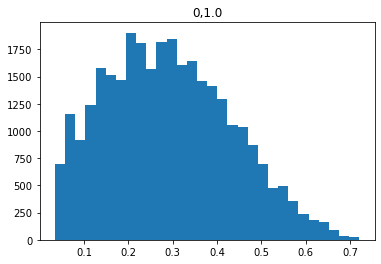

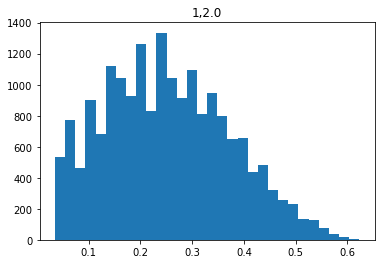

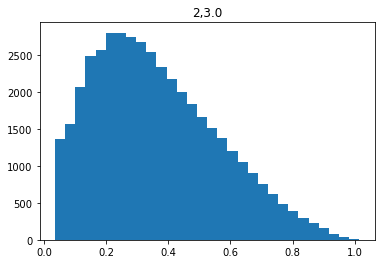

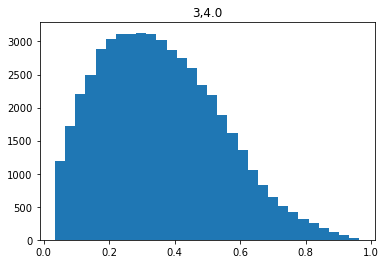

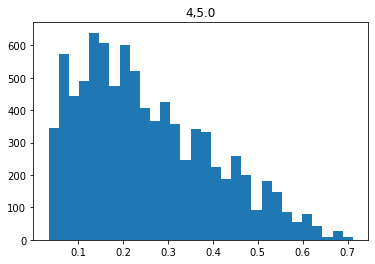

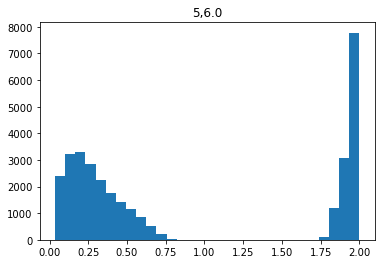

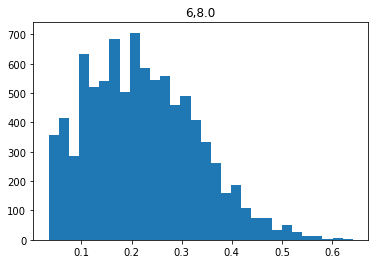

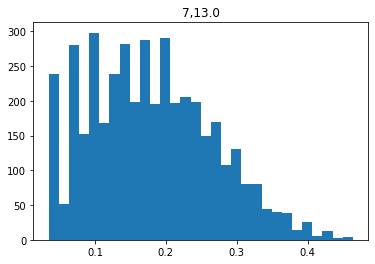

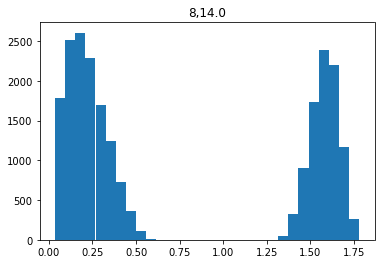

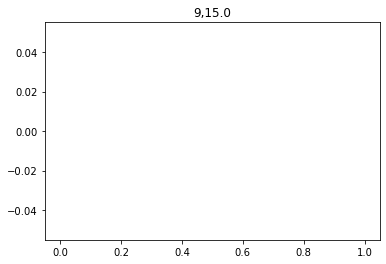

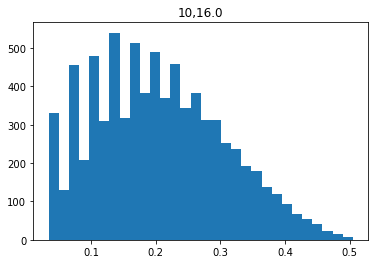

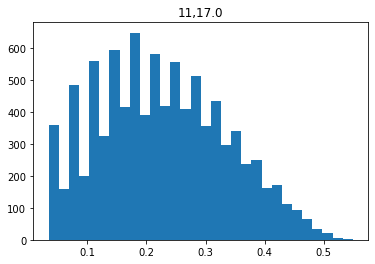

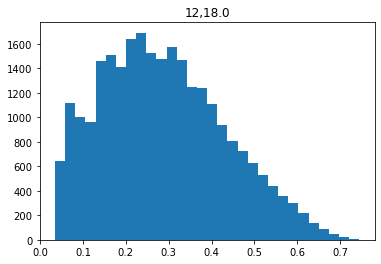

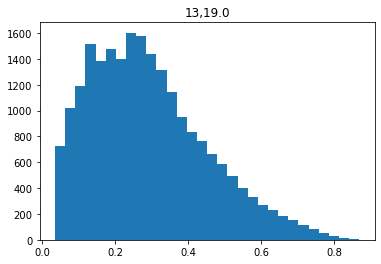

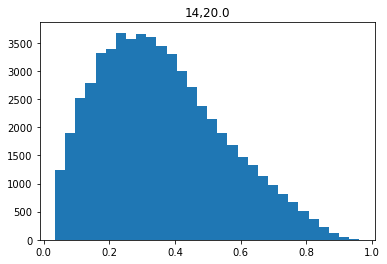

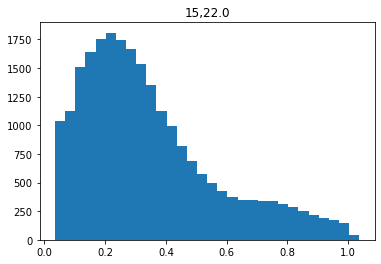

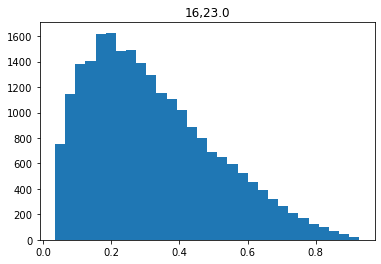

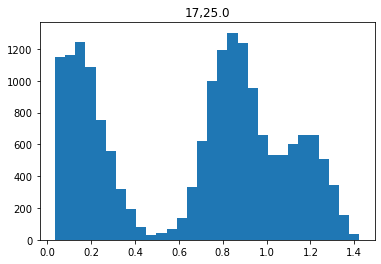

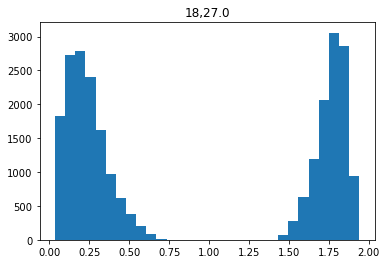

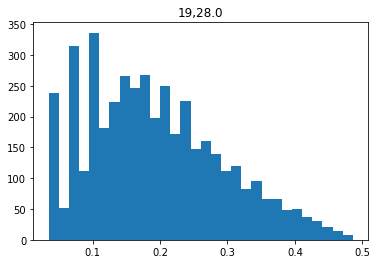

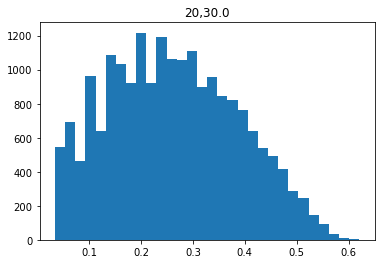

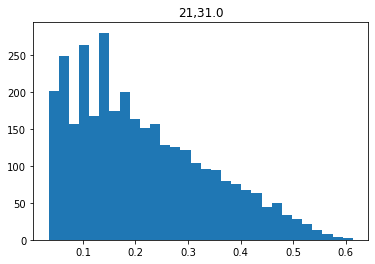

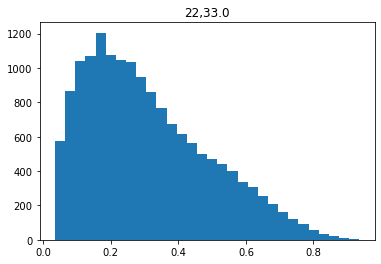

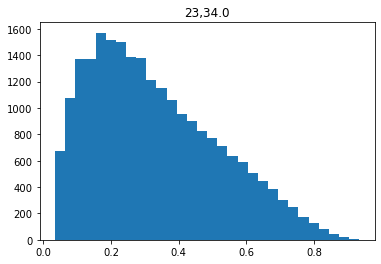

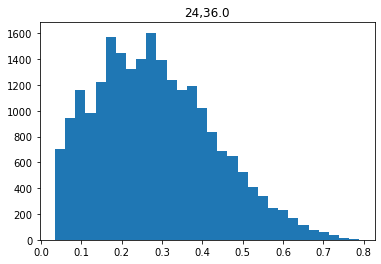

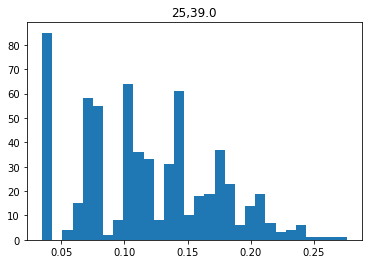

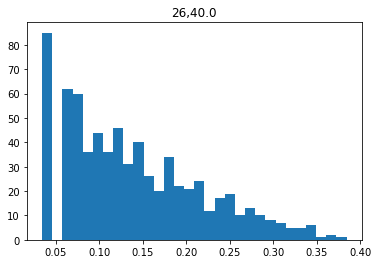

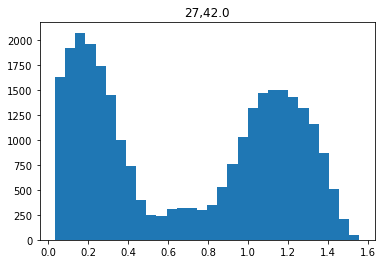

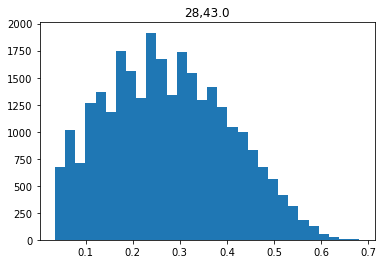

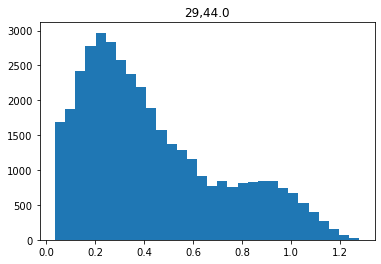

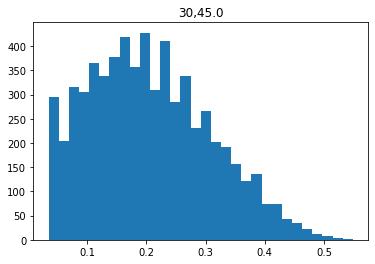

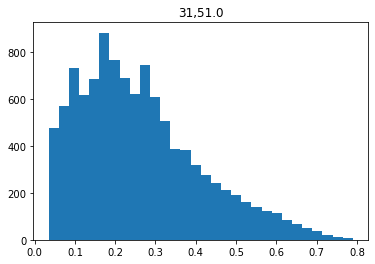

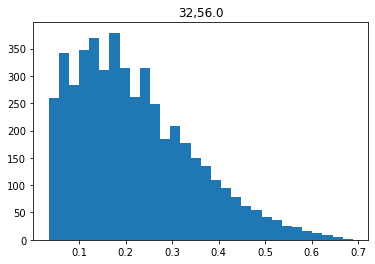

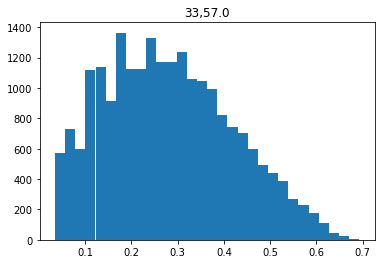

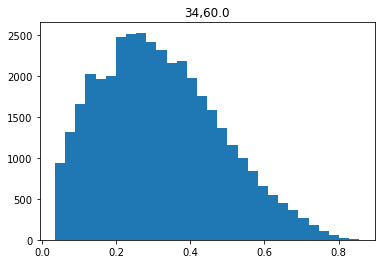

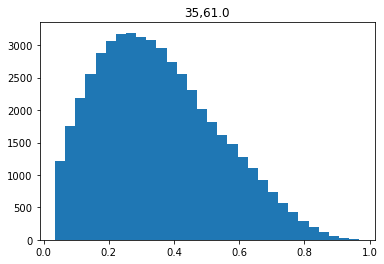

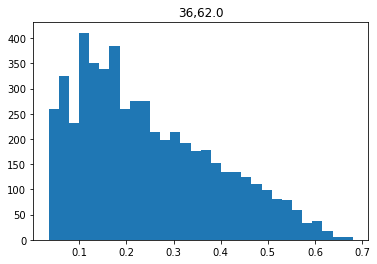

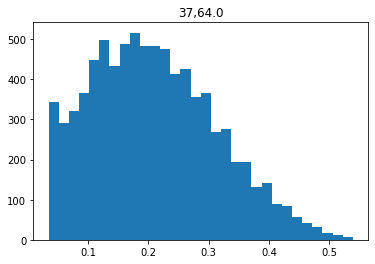

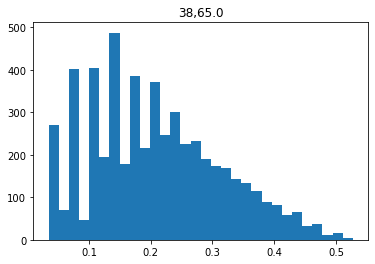

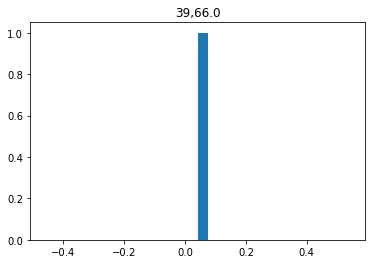

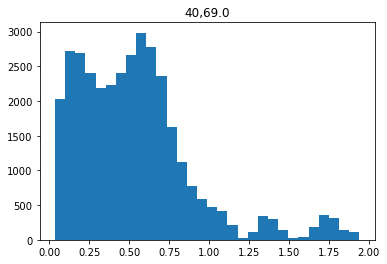

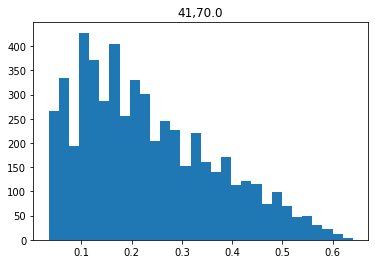

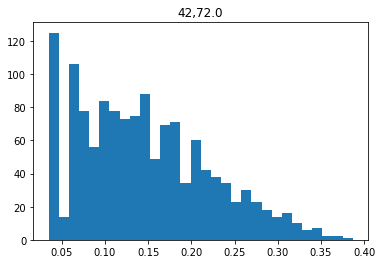

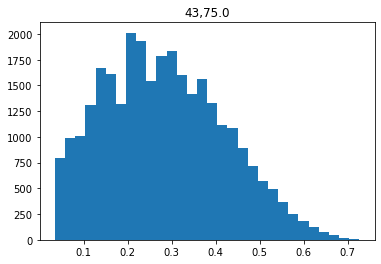

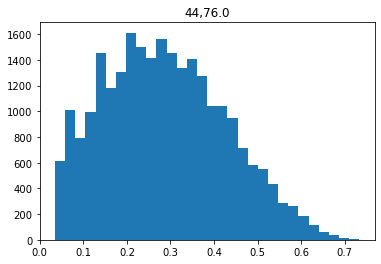

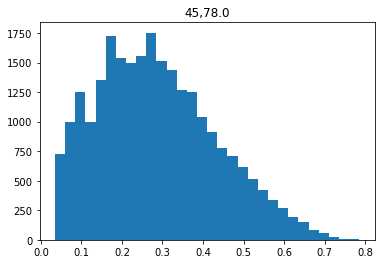

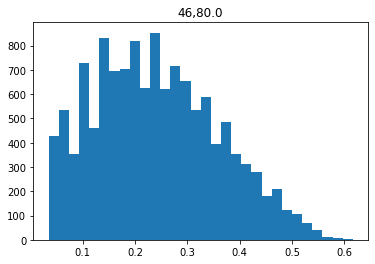

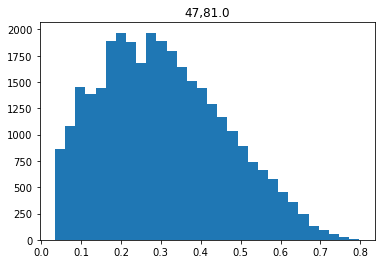

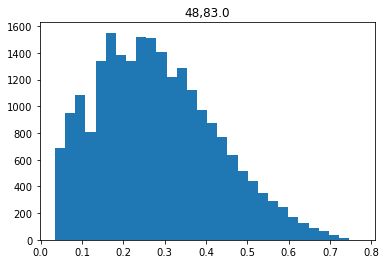

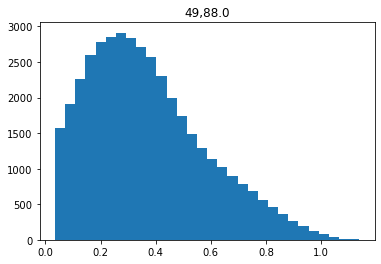

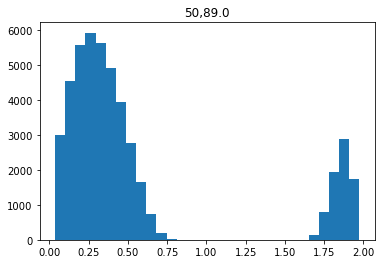

In [77]:
for i,color in enumerate(np.unique(left)[1:]):
    d = pdist(vertices[left==color])
    plt.figure()
    plt.hist(d, bins=30);
    plt.title(f'{i},{color}')

In [172]:
p = []
for i in range(10, 101, 10):
#     p1 = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level1/{i}/ensemble_1_{i}.npy')
#     p1 = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/CSPA/level1/CSPA_1_{i}.npy')
    p1 = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/average_network_partition/level3/aver_level3_{i}.npy')
    p.append(p1)
    
ami1 = []
for c1,c2 in zip(p[:-1], p[1:]):
    ami.append(adjusted_mutual_info_score(c1, c2))

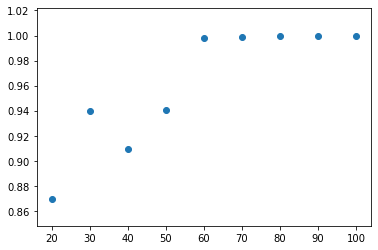

In [174]:
plt.scatter(range(20, 101, 10), ami)

In [178]:
ami

[0.8698972432027989,
 0.940032483201557,
 0.9096897675353625,
 0.9407262164390183,
 0.9979551899091611,
 0.9989315998018917,
 1.0,
 1.0,
 1.0]

In [176]:

p1 = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/average_network_partition/level1/aver_level1_10.npy')
p2 = np.load(f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/average_network_partition/level2/aver_level2_10.npy')

In [177]:
adjusted_mutual_info_score(p1, p2)

/home/kurmukov/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.5588463105696351